In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = '/Users/roas/Projects_Git/TP1/Archivos/tpc_11_19.csv'

In [12]:
df = pd.read_csv(path)

In [20]:
df['Fecha'] = pd.to_datetime(df['Fecha'],format = "%d/%m/%y")
df.set_index('Fecha',inplace=True)

In [21]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2019-06-28', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-04', '2019-07-05', '2019-07-08', '2019-07-09',
               '2019-07-10', '2019-07-11'],
              dtype='datetime64[ns]', name='Fecha', length=2143, freq=None)

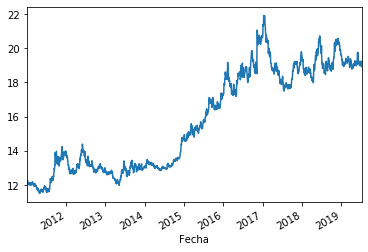

In [24]:
df['Dolar'].plot()

In [29]:
title = 'Tipo de cambio'
ylabel = 'Dolar'
xlabel = 'Fecha'

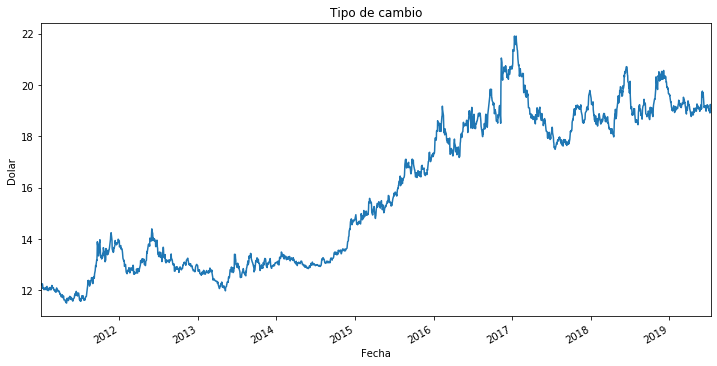

In [32]:
ax = df['Dolar'].plot(figsize = (12,6), title = title,)
ax.set(xlabel = xlabel, ylabel = ylabel)
ax.autoscale(axis='x',tight = True)

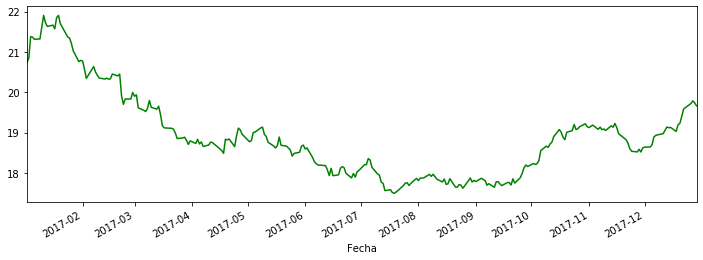

In [37]:
df['Dolar']['2017-01-01':'2017-12-31'].plot(figsize=(12,4), c='green')

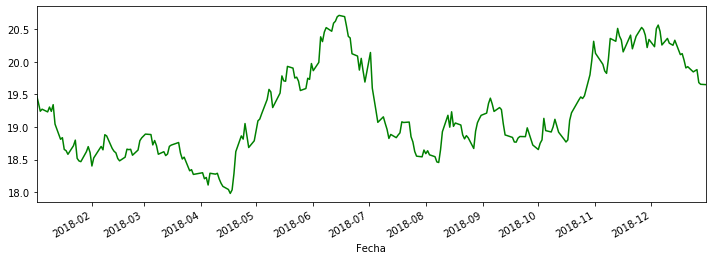

In [39]:
df['Dolar']['2018-01-01':'2018-12-31'].plot(figsize=(12,4), c='green')

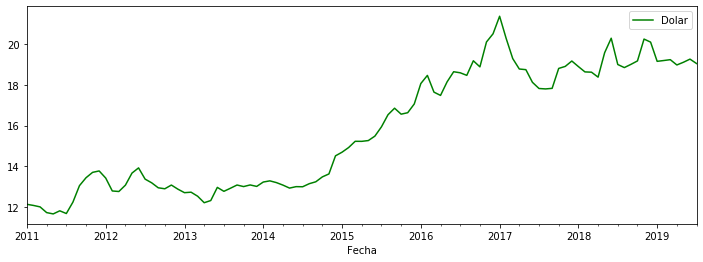

In [41]:
df.resample('M').mean().plot(figsize=(12,4), c='green')

In [47]:
dfmonthly = df.resample('M').mean()

In [43]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [56]:
cycle, trend = hpfilter(dfmonthly['Dolar'],lamb = 129600)

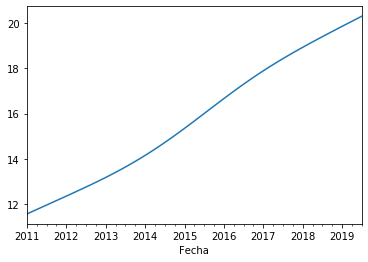

In [57]:
trend.plot()

In [58]:
dfmonthly['trend'] = trend

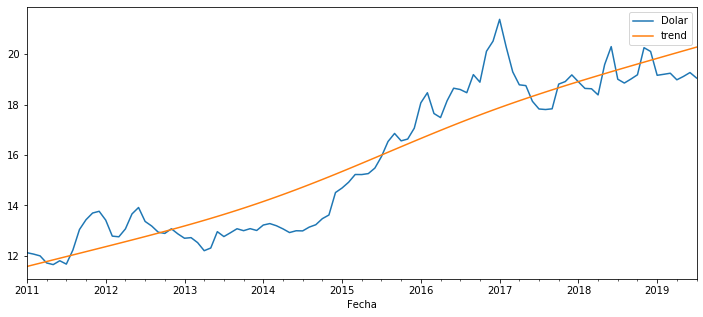

In [59]:
dfmonthly[['Dolar','trend']].plot(figsize = (12,5))

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
result = seasonal_decompose(dfmonthly['Dolar'],model='multiplicative')

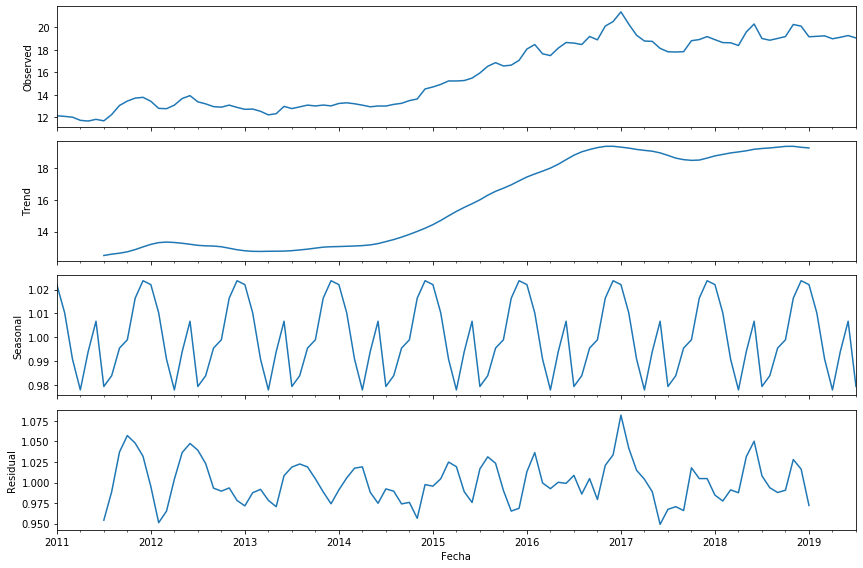

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
result.plot();

In [79]:
dfmonthly['3-month-SMA'] = dfmonthly['Dolar'].rolling(window = 3).mean()

In [81]:
dfmonthly['6-month-SMA'] = dfmonthly['Dolar'].rolling(window = 6).mean()
dfmonthly['12-month-SMA'] = dfmonthly['Dolar'].rolling(window = 12).mean()

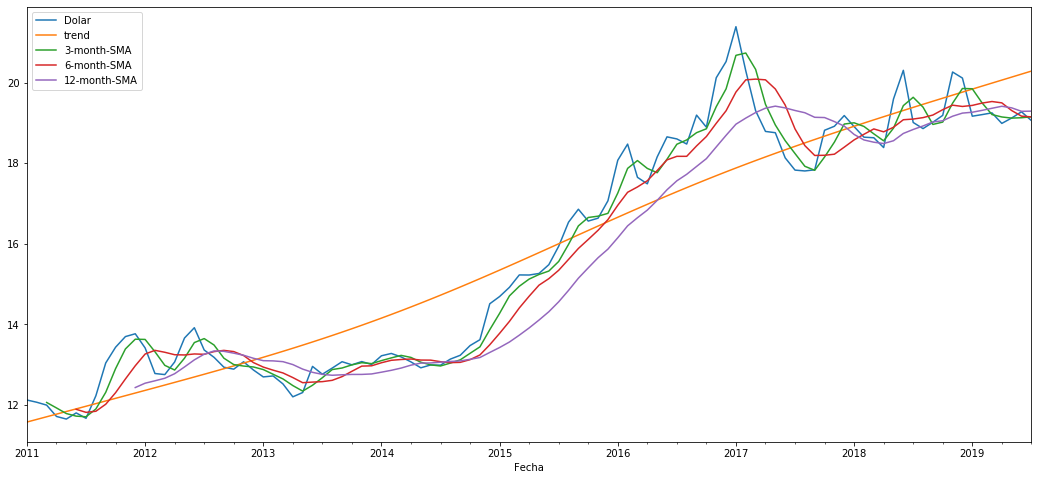

In [85]:
dfmonthly.plot(figsize=(18,8))

In [90]:
dfmonthly['EWMA-12']= dfmonthly['Dolar'].ewm(span=3).mean()

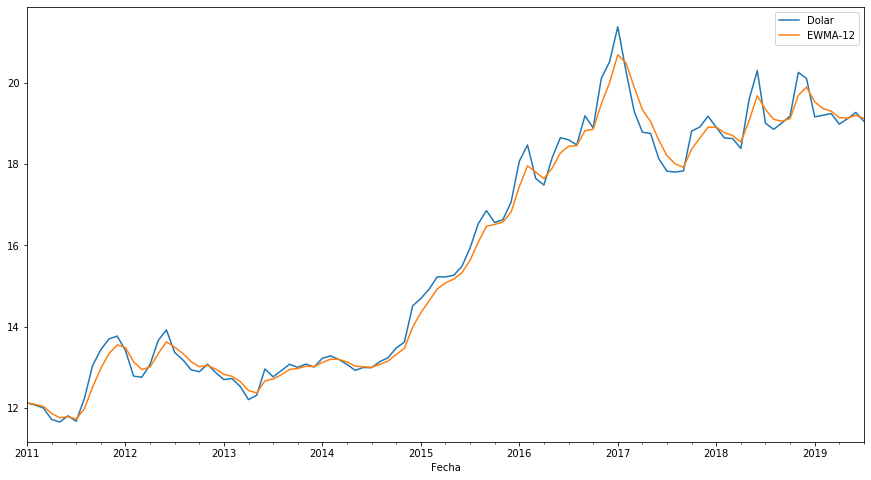

In [91]:
dfmonthly[['Dolar', 'EWMA-12']].plot(figsize=(15,8))

In [92]:
dfmonthly.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31'],
              dtype='datetime64[ns]', name='Fecha', length=103, freq='M')

In [95]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [96]:
span = 12
alpha = 2/(span+1)

In [97]:
model = SimpleExpSmoothing(dfmonthly['Dolar'])

In [98]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [101]:
dfmonthly['SES12'] = fitted_model.fittedvalues.shift(-1)

In [104]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [110]:
dfmonthly['DES_add_12'] = ExponentialSmoothing(dfmonthly['Dolar'],trend='add').fit().fittedvalues.shift(-1)

In [112]:
dfmonthly.columns

Index(['Dolar', 'trend', '3-month-SMA', '6-month-SMA', '12-month-SMA',
       'EWMA-12', 'SES12', 'DES_add_12'],
      dtype='object')

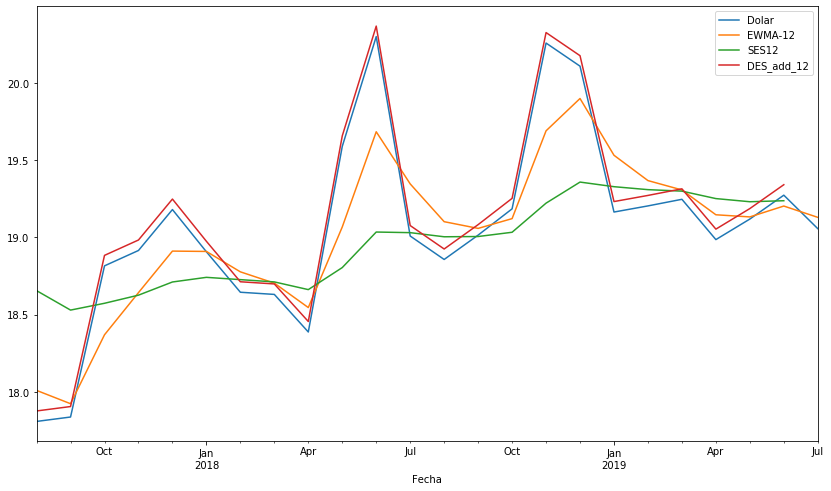

In [121]:
dfmonthly[['Dolar', 'EWMA-12', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize = (14,8))

In [127]:
dfmonthly['TES_mul_12'] = ExponentialSmoothing(dfmonthly['Dolar'],trend = 'mul',seasonal='mul',seasonal_periods=3).fit().fittedvalues.shift(-1)

/Users/roas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [128]:
dfmonthly.columns

Index(['Dolar', 'trend', '3-month-SMA', '6-month-SMA', '12-month-SMA',
       'EWMA-12', 'SES12', 'DES_add_12', 'TES_mul_12'],
      dtype='object')

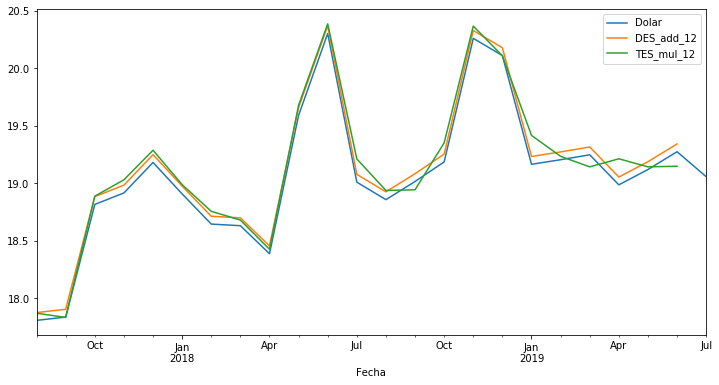

In [131]:
dfmonthly[['Dolar','DES_add_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6))

In [132]:
import warnings

In [133]:
from statsmodels.tsa.stattools import adfuller

In [134]:
adfuller(dfmonthly['Dolar'])

(-0.9564156837346217,
 0.7688270779665062,
 2,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 117.84898202952056)

In [135]:
dftest = adfuller(dfmonthly['Dolar'])
dfout = pd.Series(dftest[0:4],index = ['ADF Test Statistic','p-value','# Lags Used','# Observations'])

In [138]:
for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [140]:
dfout

ADF Test Statistic      -0.956416
p-value                  0.768827
# Lags Used              2.000000
# Observations         100.000000
critical value(1%)      -3.497501
critical value(5%)      -2.890906
critical value(10%)     -2.582435
dtype: float64

In [141]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

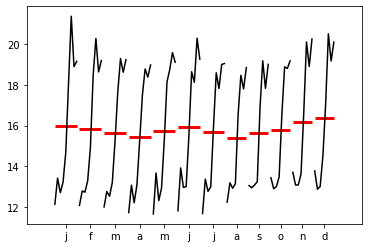

In [144]:
month_plot(dfmonthly['Dolar']);